In [1]:
from model import *

buffer_size = 30

In [2]:
motion_data_dir = r"C:\\Users\\chros\\Documents\\Deep Racing\\australia_run1\\udp_data\\motion_packets"
udp_filename = r"data\\udp_data.pkl"

udp_dataset = StateEstimationDataset(motion_data_dir, udp_filename, buffer_size)
train_dataset, val_dataset = udp_dataset.split(0.8)

Pickle file already exists


In [3]:
print(len(train_dataset))
print(len(val_dataset))

138640
34660


In [4]:
batch_size=32

train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

In [5]:
model = StateEstimationNet(buffer_size=buffer_size, input_shape=udp_dataset.X_data.shape[-1], hidden_dim=32, n_layers=3, batch_size=batch_size)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

model.compile(loss_function=loss_function, optimizer=optimizer)

In [6]:
model_path = 'models/state_dict_30.pt'
print(model)

StateEstimationNet(
  (lstm): LSTM(360, 32, num_layers=3, batch_first=True, dropout=0.0002)
  (fc): Linear(in_features=32, out_features=90, bias=True)
  (loss_function): MSELoss()
)


In [7]:
epochs = 20

model.fit(epochs=epochs, train_data_loader=train_data_loader, val_data_loader=val_data_loader, model_path=model_path)

Validation loss decreased (inf --> 58648.268806).  Saving model ...
Epoch: 1/20... Loss: 51466.441406... Val Loss: 58648.268806
Validation loss decreased (58648.268806 --> 23195.777679).  Saving model ...
Epoch: 2/20... Loss: 20277.884766... Val Loss: 23195.777679
Validation loss decreased (23195.777679 --> 4834.958320).  Saving model ...
Epoch: 3/20... Loss: 5531.009277... Val Loss: 4834.958320
Validation loss decreased (4834.958320 --> 839.524003).  Saving model ...
Epoch: 4/20... Loss: 720.690430... Val Loss: 839.524003
Validation loss decreased (839.524003 --> 191.203050).  Saving model ...
Epoch: 5/20... Loss: 181.790131... Val Loss: 191.203050
Validation loss decreased (191.203050 --> 116.739793).  Saving model ...
Epoch: 6/20... Loss: 106.243622... Val Loss: 116.739793
Validation loss decreased (116.739793 --> 80.773935).  Saving model ...
Epoch: 7/20... Loss: 67.328819... Val Loss: 80.773935
Epoch: 8/20... Loss: 78.444359... Val Loss: 96.628216
Validation loss decreased (80.773

In [8]:
model.load_state_dict(torch.load(model_path))
predictions, labels = model.predict(val_data_loader)

Loss: 51.323


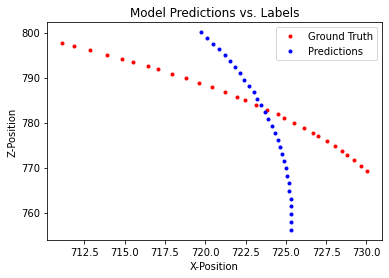

In [11]:
from visualize import visualize_waypoint_predictions

timestamp_number = 50
vehicle_id = 10

visualize_waypoint_predictions(labels[timestamp_number][vehicle_id].cpu(), predictions[timestamp_number][vehicle_id].cpu().detach())